<a href="https://colab.research.google.com/github/DevanshMistry890/python/blob/main/Iris_flower_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Machine Learning: Classification - Final Report


---

##Objective
Our main purpose of doing this analysis/prediction is predict class of flower by its given features

### Data Acknowledgements
Dataset, have used here is Iris Flower dataset from sklearn library.

###Importing Libraries

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

### Loading Dataset

In [2]:
! wget https://raw.githubusercontent.com/DevanshMistry890/iris-flower-classification/main/iris.csv

--2022-12-28 12:18:54--  https://raw.githubusercontent.com/DevanshMistry890/iris-flower-classification/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3865 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2022-12-28 12:18:54 (47.0 MB/s) - ‘iris.csv’ saved [3865/3865]



In [5]:
dataset = pd.read_csv("iris.csv")

### Data Description

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As shown here, our dataset contains 4 float and 1 Object datatype as total 5 columns, with 150 row without any null value.

### EDA

In [6]:
dataset.shape

(150, 5)

In [7]:
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
dataset.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
dataset['Class'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: Class, dtype: int64

**Dataset is balanced among classes.**

### Visulizations

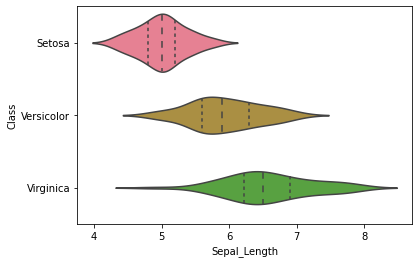

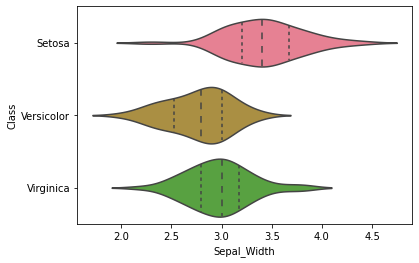

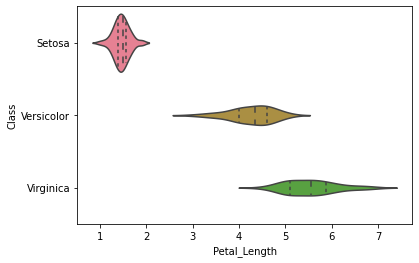

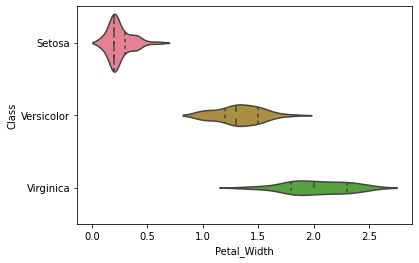

In [14]:
sns.violinplot(y='Class', x='Sepal_Length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Class', x='Sepal_Width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Class', x='Petal_Length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Class', x='Petal_Width', data=dataset, inner='quartile')
plt.show()

> **Insight:** The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.




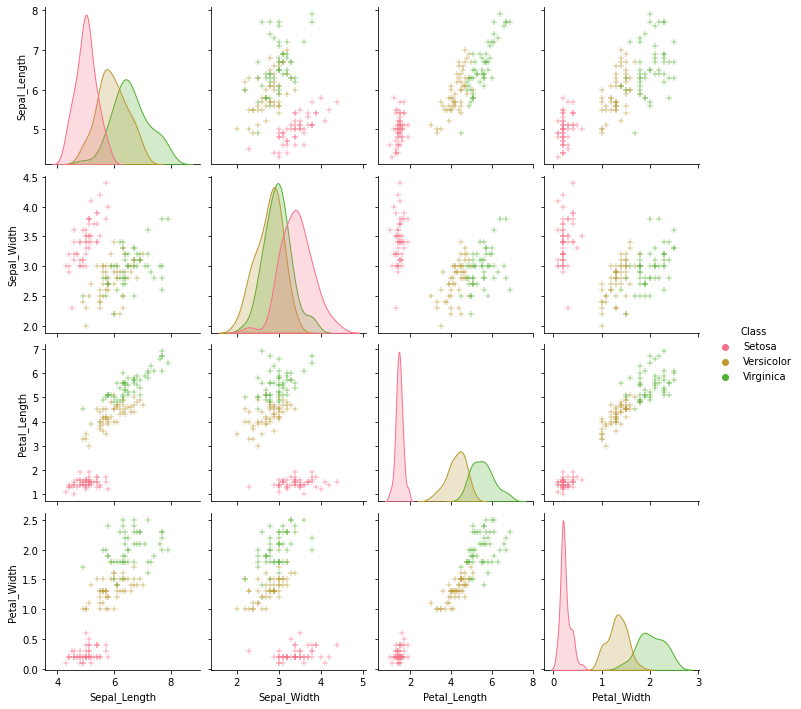

In [15]:
sns.pairplot(dataset, hue='Class', markers='+')
plt.show()

> Insight: we can see that Iris-Setosa is separated from both other species in all the features

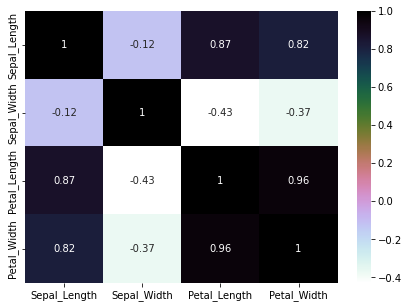

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

### Data Splitting
spliting data into 80-20 ratio



In [17]:
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Modeling
We don't know which algorithms would be best for this problem.
Let's check each algorithm in loop and print its accuracy, so that we can select our best algorithm.

Let's test 6 different algorithms:
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).


In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []

In [25]:
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))    

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVC: 0.983333 (0.033333)


Support Vector Classifier (SVC) is performing better than other algorithms.
Let's train SVC model on our training set and predict on test set in the next step.

In [22]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [23]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report: 
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



###Conclusion 
We have implemented various classification models. We can use them to predict class of flowers. Which satisfy our main objective.
following points to take  out:

1. **SVC is performing overall best**. However, tuning hyperparameter values will lead to more better efficiency. 

2. According to our requirement of problem, we can choose more effective model based on Precision, Recall and F1 Score.

4. The lower precision & recall, the more aggressive the misclassification.

## Suggestions for next steps:

> SVC model hyperparameter Tuning More efficient Range

> Trying more newer models like XGBoost Classsifier, LGBM Classifier, Ensamble Modals.





---
Devansh Mistry